# Model Brice 

In [20]:
%load_ext autoreload
%autoreload 2

import sys, os 
from src.data import open_and_transform_csv2
from src.graphs import graph_df_strike_duration_selection
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

# Add folder location to Python paths so that packages can be imported 
p = os.path.abspath('../')
if p not in sys.path:
    sys.path.append(p)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# Import data 
spx_daily = open_and_transform_csv2(r'../data/spx_daily.xlsx')

In [22]:
spx_daily["Duration"].unique()

array(['6M', '1Y', '18M', '2Y', '3Y'], dtype=object)

In [23]:
spx_daily["Maturity"] = spx_daily["Duration"].map({'6M':0.5, '1Y':1, '18M':1.5, '2Y':2, '3Y':3})
spx_daily.head()

,Dates,Spot t,Spot t-1,Volatility,Duration,Strike,Implied_vol,Change_in_implied_vol,Maturity
0,2019-04-18,2900.45,2900.45,38.4404,6M,40,38.440400,1.641000,0.5
1,2019-04-17,2900.45,2907.06,36.7994,6M,40,36.775402,0.371102,0.5
2,2019-04-16,2907.06,2905.58,36.4043,6M,40,36.408560,0.770860,0.5
3,2019-04-15,2905.58,2907.41,35.6377,6M,40,35.632016,0.756616,0.5
4,2019-04-12,2907.41,2888.32,34.8754,6M,40,34.972001,-0.474299,0.5


In [229]:
from src.data_analysis import get_subtable

df_t = get_subtable(spx_daily, 100, "1Y")
df_t

,Dates,Spot t,Spot t-1,Volatility,Duration,Strike,Implied_vol,Change_in_implied_vol,Maturity,Day_of_week
0,2019-04-18,2900.45,2900.45,14.5486,1Y,100,14.548600,-0.043300,1.0,3
1,2019-04-17,2900.45,2907.06,14.5919,1Y,100,14.513568,0.037068,1.0,2
2,2019-04-16,2907.06,2905.58,14.4765,1Y,100,14.494670,0.006670,1.0,1
3,2019-04-15,2905.58,2907.41,14.4880,1Y,100,14.467075,0.053275,1.0,0
4,2019-04-12,2907.41,2888.32,14.4138,1Y,100,14.644936,0.022836,1.0,4
...,...,...,...,...,...,...,...,...,...,...
3225,2006-12-07,1407.29,1412.90,14.3064,1Y,100,14.216495,-0.848005,1.0,3
3226,2006-12-06,1412.90,1414.76,15.0645,1Y,100,15.030987,0.241987,1.0,2
3227,2006-12-05,1414.76,1409.12,14.7890,1Y,100,14.899351,-0.738649,1.0,1
3228,2006-12-04,1409.12,1396.71,15.6380,1Y,100,15.884285,0.339185,1.0,0


In [ ]:

def create_change_in_spot(df, var): 
    if var == "Spot t": 
        df[f"Change_in_{var}"] = (df[var] - df[f"{var}-1"])/ df[f"{var}-1"]
    else: 
        df[f"Change_in_{var}"] = (df[var] - df[var[:-1]+str(int(var[-1])+1)])/ df[var[:-1]+str(int(var[-1])+1)]
    return df 




In [265]:
def shift_spots(df, level_shift): 
    
    for shift in range(level_shift): 
        if shift == 0: 
            df[f"Spot t-{shift+1}"] = df[f"Spot t"].shift(-1)
        else: 
            df[f"Spot t-{shift+1}"] = df[f"Spot t-{shift}"].shift(-1)
    return df


def shift_implied_vol(df, level_shift): 
    
    for shift in range(level_shift): 
        if shift == 0: 
            df[f"Implied_vol t-{shift+1}"] = df[f"Implied_vol"].shift(-1)
        else: 
            df[f"Implied_vol t-{shift+1}"] = df[f"Implied_vol t-{shift}"].shift(-1)
    return df


def create_difference(df, var):
    df[f"Change_in_{var}"] = (df[var] - df[f"{var}-1"])/ df[f"{var}-1"]
    return df 

def create_diff_implied_vol(df): 
    var = "Implied_vol t"
    df[f"Change_in_{var}"] = (df["Implied_vol"] - df[f"{var}-1"])/ df[f"{var}-1"]
    return df 
    

def shift_change_in_spots(df, level_shift): 
    
    for shift in range(level_shift): 
        if shift == 0: 
            df[f"Change_in_Spot t-{shift+1}"] = df[f"Change_in_Spot t"].shift(-1)
        else: 
            df[f"Change_in_Spot t-{shift+1}"] = df[f"Change_in_Spot t-{shift}"].shift(-1)
    return df


def shift_change_in_implied_vol(df, level_shift): 
    
    for shift in range(level_shift): 
        if shift == 0: 
            df[f"Change_in_Implied_vol t-{shift+1}"] = df[f"Change_in_Implied_vol t"].shift(-1)
        else: 
            df[f"Change_in_Implied_vol t-{shift+1}"] = df[f"Change_in_Implied_vol t-{shift}"].shift(-1)
            
    return df 

In [269]:
df_t.head()
var = "Implied_vol t"
df_t[f"Change_in_{var}"] = (df_t["Implied_vol"] - df_t[f"{var}-1"])/ df_t[f"{var}-1"]


def create_diff_implied_vol(df): 
    var = "Implied_vol t"
    df[f"Change_in_{var}"] = (df["Implied_vol"] - df[f"{var}-1"])/ df[f"{var}-1"]
    return df 

df_t = shift_change_in_implied_vol(df_t, 3)
df_t

,Dates,Spot t,Spot t-1,Volatility,Duration,Strike,Implied_vol,Change_in_implied_vol,Maturity,Day_of_week,...,Implied_vol t-3,Implied_vol t-4,Implied_vol t-5,Implied_vol t-6,Implied_vol t-7,Implied_vol t-8,Change_in_Implied_vol t,Change_in_Implied_vol t-1,Change_in_Implied_vol t-2,Change_in_Implied_vol t-3
0,2019-04-18,2900.45,2900.45,14.5486,1Y,100,14.548600,-0.043300,1.0,3,...,14.467075,14.644936,14.623491,14.718488,14.632200,14.516375,0.002414,0.001304,0.001907,-0.012145
1,2019-04-17,2900.45,2907.06,14.5919,1Y,100,14.513568,0.037068,1.0,2,...,14.644936,14.623491,14.718488,14.632200,14.516375,14.629560,0.001304,0.001907,-0.012145,0.001466
2,2019-04-16,2907.06,2905.58,14.4765,1Y,100,14.494670,0.006670,1.0,1,...,14.623491,14.718488,14.632200,14.516375,14.629560,14.775369,0.001907,-0.012145,0.001466,-0.006454
3,2019-04-15,2905.58,2907.41,14.4880,1Y,100,14.467075,0.053275,1.0,0,...,14.718488,14.632200,14.516375,14.629560,14.775369,14.800916,-0.012145,0.001466,-0.006454,0.005897
4,2019-04-12,2907.41,2888.32,14.4138,1Y,100,14.644936,0.022836,1.0,4,...,14.632200,14.516375,14.629560,14.775369,14.800916,14.728331,0.001466,-0.006454,0.005897,0.007979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,2006-12-07,1407.29,1412.90,14.3064,1Y,100,14.216495,-0.848005,1.0,3,...,15.884285,15.470164,NaN,NaN,NaN,NaN,-0.054188,0.008835,-0.062007,0.026769
3226,2006-12-06,1412.90,1414.76,15.0645,1Y,100,15.030987,0.241987,1.0,2,...,15.470164,NaN,NaN,NaN,NaN,NaN,0.008835,-0.062007,0.026769,NaN
3227,2006-12-05,1414.76,1409.12,14.7890,1Y,100,14.899351,-0.738649,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.062007,0.026769,NaN,NaN
3228,2006-12-04,1409.12,1396.71,15.6380,1Y,100,15.884285,0.339185,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.026769,NaN,NaN,NaN


In [270]:
from datetime import timedelta  

def create_augmented_df(df): 
    
    strikes = [40,  60,  80,  90, 100, 110, 120]
    maturities = ["6M", "1Y", "18M", "2Y", "3Y"]
    strikes_and_maturities = [(s, m) for s in strikes for m in maturities]
    df_total = pd.DataFrame()
    
    for strike_maturity in strikes_and_maturities:
        strike, maturity = strike_maturity
        df_temp = get_subtable(df, strike, maturity)   
        # Spots
        df_temp = shift_spots(df_temp, 8)
        df_temp = create_difference(df_temp, "Spot t")
        df_temp = shift_change_in_spots(df_temp, 7)
        # Implied_vol 
        df_temp = shift_implied_vol(df_temp, 8)
        df_temp = create_diff_implied_vol(df_temp)
        df_temp = shift_change_in_implied_vol(df_temp, 7)
        
        df_total = pd.concat([df_total, df_temp])
    
    df["Day_of_week"] = df["Dates"].dt.dayofweek
    
    return df_total

In [271]:
import warnings
warnings.filterwarnings("ignore")

df_augmented = create_augmented_df(spx_daily)

In [277]:
df_augmented.head(5)

,Dates,Spot t,Spot t-1,Volatility,Duration,Strike,Implied_vol,Change_in_implied_vol,Maturity,Day_of_week,...,Implied_vol t-8,Change_in_Implied_vol t,Change_in_Implied_vol t-1,Change_in_Implied_vol t-2,Change_in_Implied_vol t-3,Change_in_Implied_vol t-4,Change_in_Implied_vol t-5,Change_in_Implied_vol t-6,Change_in_Implied_vol t-7,Spot_100_strike
0,2019-04-18,2900.45,2900.45,38.4404,6M,40,38.440400,1.641000,0.5,3,...,38.390907,0.045275,0.010076,0.021793,0.018873,-0.013398,-0.023713,-0.013054,-0.041749,None
1,2019-04-17,2900.45,2907.06,36.7994,6M,40,36.775402,0.371102,0.5,2,...,38.069490,0.010076,0.021793,0.018873,-0.013398,-0.023713,-0.013054,-0.041749,0.008443,None
2,2019-04-16,2907.06,2905.58,36.4043,6M,40,36.408560,0.770860,0.5,1,...,37.582262,0.021793,0.018873,-0.013398,-0.023713,-0.013054,-0.041749,0.008443,0.012964,None
3,2019-04-15,2905.58,2907.41,35.6377,6M,40,35.632016,0.756616,0.5,0,...,38.299770,0.018873,-0.013398,-0.023713,-0.013054,-0.041749,0.008443,0.012964,-0.018734,None
4,2019-04-12,2907.41,2888.32,34.8754,6M,40,34.972001,-0.474299,0.5,4,...,36.867191,-0.013398,-0.023713,-0.013054,-0.041749,0.008443,0.012964,-0.018734,0.038858,None


In [522]:
import pandas as pd 

df1.to_csv("df1.csv")

df = pd.read_csv('df1.csv')  
df.shape

(40, 43)

# NN - three-feature model: Strike, Spot, Maturity 

In [413]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(df_augmented3.iloc[:, [5, 8, 18]], dtype='float32')
target = np.asarray(df_augmented3.iloc[:, 7], dtype='float32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(scaler.mean_)

[8.57347921e+01 1.59826971e+00 3.10433608e-04]


In [414]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers

input_dim = X_train.shape[1]
hidden_dim = 20
output_dim = 1

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="sigmoid"))
model.add(Dense(output_dim, activation="linear"))

In [415]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [416]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, validation_split=0.1, epochs=150, batch_size=32)

Train on 81194 samples, validate on 9022 samples
Epoch 1/150
81194/81194 [==============================] - 5s 61us/sample - loss: 0.3744 - mean_absolute_error: 0.3233 - val_loss: 0.3535 - val_mean_absolute_error: 0.3129
Epoch 2/150
81194/81194 [==============================] - 3s 42us/sample - loss: 0.3713 - mean_absolute_error: 0.3199 - val_loss: 0.3525 - val_mean_absolute_error: 0.3114
Epoch 3/150
81194/81194 [==============================] - 4s 51us/sample - loss: 0.3708 - mean_absolute_error: 0.3196 - val_loss: 0.3551 - val_mean_absolute_error: 0.3152
Epoch 4/150
81194/81194 [==============================] - 3s 39us/sample - loss: 0.3706 - mean_absolute_error: 0.3198 - val_loss: 0.3525 - val_mean_absolute_error: 0.3111
Epoch 5/150
81194/81194 [==============================] - 4s 45us/sample - loss: 0.3704 - mean_absolute_error: 0.3197 - val_loss: 0.3537 - val_mean_absolute_error: 0.3130
Epoch 6/150
81194/81194 [==============================] - 4s 48us/sample - loss: 0.3700 - 

81194/81194 [==============================] - 4s 44us/sample - loss: 0.3685 - mean_absolute_error: 0.3195 - val_loss: 0.3544 - val_mean_absolute_error: 0.314630 - mean_absolute_error: 0.320 - ETA: 1s - loss: 0.3631 - 
Epoch 49/150
81194/81194 [==============================] - 4s 45us/sample - loss: 0.3684 - mean_absolute_error: 0.3196 - val_loss: 0.3525 - val_mean_absolute_error: 0.3137
Epoch 50/150
81194/81194 [==============================] - 4s 44us/sample - loss: 0.3685 - mean_absolute_error: 0.3195 - val_loss: 0.3533 - val_mean_absolute_error: 0.3135
Epoch 51/150
81194/81194 [==============================] - 3s 43us/sample - loss: 0.3685 - mean_absolute_error: 0.3197 - val_loss: 0.3530 - val_mean_absolute_error: 0.3154
Epoch 52/150
81194/81194 [==============================] - 3s 42us/sample - loss: 0.3685 - mean_absolute_error: 0.3196 - val_loss: 0.3529 - val_mean_absolute_error: 0.3134or: 0.
Epoch 53/150
81194/81194 [==============================] - 4s 44us/sample - loss: 

81194/81194 [==============================] - 3s 38us/sample - loss: 0.3678 - mean_absolute_error: 0.3184 - val_loss: 0.3545 - val_mean_absolute_error: 0.3148
Epoch 95/150
81194/81194 [==============================] - 3s 39us/sample - loss: 0.3678 - mean_absolute_error: 0.3185 - val_loss: 0.3519 - val_mean_absolute_error: 0.3115
Epoch 96/150
81194/81194 [==============================] - 3s 38us/sample - loss: 0.3676 - mean_absolute_error: 0.3183 - val_loss: 0.3530 - val_mean_absolute_error: 0.3127
Epoch 97/150
81194/81194 [==============================] - 3s 39us/sample - loss: 0.3679 - mean_absolute_error: 0.3186 - val_loss: 0.3525 - val_mean_absolute_error: 0.31246 - m
Epoch 98/150
81194/81194 [==============================] - 3s 39us/sample - loss: 0.3676 - mean_absolute_error: 0.3186 - val_loss: 0.3532 - val_mean_absolute_error: 0.3135
Epoch 99/150
81194/81194 [==============================] - 3s 39us/sample - loss: 0.3677 - mean_absolute_error: 0.3184 - val_loss: 0.3522 - va

81194/81194 [==============================] - 3s 40us/sample - loss: 0.3674 - mean_absolute_error: 0.3179 - val_loss: 0.3518 - val_mean_absolute_error: 0.3124
Epoch 141/150
81194/81194 [==============================] - 3s 40us/sample - loss: 0.3674 - mean_absolute_error: 0.3184 - val_loss: 0.3512 - val_mean_absolute_error: 0.3121
Epoch 142/150
81194/81194 [==============================] - 3s 40us/sample - loss: 0.3674 - mean_absolute_error: 0.3179 - val_loss: 0.3520 - val_mean_absolute_error: 0.3136
Epoch 143/150
81194/81194 [==============================] - 3s 40us/sample - loss: 0.3673 - mean_absolute_error: 0.3180 - val_loss: 0.3511 - val_mean_absolute_error: 0.3121
Epoch 144/150
81194/81194 [==============================] - 3s 40us/sample - loss: 0.3673 - mean_absolute_error: 0.3179 - val_loss: 0.3520 - val_mean_absolute_error: 0.3133
Epoch 145/150
81194/81194 [==============================] - 3s 40us/sample - loss: 0.3674 - mean_absolute_error: 0.3180 - val_loss: 0.3515 - va

In [417]:
# Get history - see convergence 
history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
history_df.head()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error,epoch
0,0.374384,0.323256,0.353458,0.312868,0
1,0.371258,0.319928,0.352522,0.311440,1
2,0.370782,0.319590,0.355073,0.315199,2
3,0.370633,0.319794,0.352461,0.311115,3
4,0.370379,0.319701,0.353719,0.313027,4


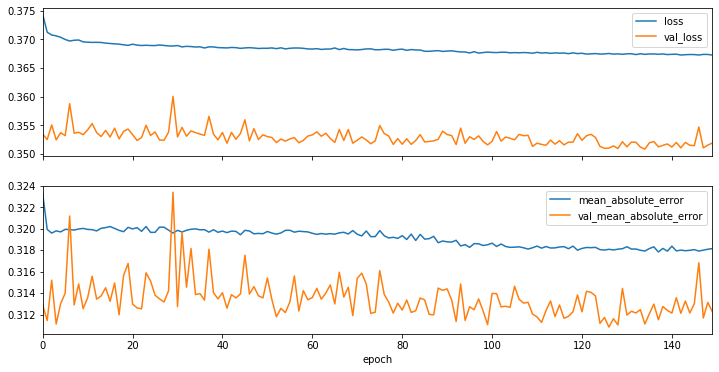

In [418]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["mean_absolute_error", "val_mean_absolute_error"], ax=ax1);

In [419]:
predictions = model.predict(X_test)

test_df = pd.DataFrame(y_test).rename(columns={0:"y_test"})
test_df["predicted"] = model.predict(X_test)
test_df

,y_test,predicted
0,0.054970,-0.018172
1,0.155692,0.035106
2,0.108148,0.008038
3,0.086505,-0.000463
4,0.046085,0.012174
...,...,...
22549,0.000000,-0.000637
22550,4.369063,-0.030410
22551,0.101855,0.019043
22552,-1.872692,-0.002071


In [420]:
# Results 
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

print(' mean_absolute_error: ', mean_absolute_error(y_test, predictions), '\n',
'mean_squared_error', mean_squared_error(y_test, predictions), '\n',
'explained_variance_score', explained_variance_score(y_test, predictions))

 mean_absolute_error:  0.31766742 
 mean_squared_error 0.35424855 
 explained_variance_score 0.012881278991699219


# Add lagged variables - Model 2 

In [447]:
cols = df_augmented3.columns
[list((i, cols[i])) for i in range(len(cols))]

cols_index = [i for i in range(len(cols)) if i not in [0, 1, 3, 4, 6, 7, 17, 33, 41, 42, 43, 44, 45, 46]]
#cols_index_ = cols_index.remove([0, 1, 3, 4, 6, 7, 17, 33, 41, 42, 43, 44, 45, 46])

In [451]:
d = df_augmented3.iloc[:, cols_index]
d.columns

Index(['Spot t-1', 'Strike', 'Maturity', 'Day_of_week', 'Spot t-2', 'Spot t-3',
       'Spot t-4', 'Spot t-5', 'Spot t-6', 'Spot t-7', 'Spot t-8',
       'Change_in_Spot t-1', 'Change_in_Spot t-2', 'Change_in_Spot t-3',
       'Change_in_Spot t-4', 'Change_in_Spot t-5', 'Change_in_Spot t-6',
       'Change_in_Spot t-7', 'Implied_vol t-1', 'Implied_vol t-2',
       'Implied_vol t-3', 'Implied_vol t-4', 'Implied_vol t-5',
       'Implied_vol t-6', 'Implied_vol t-7', 'Implied_vol t-8',
       'Change_in_Implied_vol t-1', 'Change_in_Implied_vol t-2',
       'Change_in_Implied_vol t-3', 'Change_in_Implied_vol t-4',
       'Change_in_Implied_vol t-5', 'Change_in_Implied_vol t-6',
       'Change_in_Implied_vol t-7'],
      dtype='object')

In [453]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(df_augmented3.iloc[:, cols_index], dtype='float32')
target = np.asarray(df_augmented3.iloc[:, 7], dtype='float32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(scaler.mean_)

[1.72097253e+03 8.57347921e+01 1.59826971e+00 2.00543141e+00
 1.72048388e+03 1.71997887e+03 1.71951251e+03 1.71901769e+03
 1.71855813e+03 1.71807584e+03 1.71758822e+03 3.10433608e-04
 3.27365729e-04 3.03057327e-04 3.27810895e-04 2.97953721e-04
 3.17845646e-04 3.00679465e-04 2.43836630e+01 2.43828065e+01
 2.43840296e+01 2.43829161e+01 2.43835482e+01 2.43828116e+01
 2.43828451e+01 2.43812775e+01 3.06635633e-04 2.28318698e-04
 3.06970395e-04 2.45961347e-04 3.05949370e-04 2.59340184e-04
 3.30612073e-04]


In [454]:
input_dim = X_train.shape[1]
hidden_dim = 20
output_dim = 1

model2 = Sequential()
model2.add(Dense(hidden_dim, input_dim=input_dim, activation="sigmoid"))
model2.add(Dense(output_dim, activation="linear"))

In [455]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                680       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [457]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history2 = model2.fit(X_train, y_train, validation_split=0.1, epochs=150, batch_size=32)

Train on 81194 samples, validate on 9022 samples
Epoch 1/150
81194/81194 [==============================] - 4s 53us/sample - loss: 0.3829 - mean_absolute_error: 0.3463 - val_loss: 0.3280 - val_mean_absolute_error: 0.3175
Epoch 2/150
81194/81194 [==============================] - 4s 49us/sample - loss: 0.3347 - mean_absolute_error: 0.3197 - val_loss: 0.3149 - val_mean_absolute_error: 0.3164
Epoch 3/150
81194/81194 [==============================] - 4s 46us/sample - loss: 0.3208 - mean_absolute_error: 0.3169 - val_loss: 0.3016 - val_mean_absolute_error: 0.3086
Epoch 4/150
81194/81194 [==============================] - 4s 49us/sample - loss: 0.3083 - mean_absolute_error: 0.3140 - val_loss: 0.2944 - val_mean_absolute_error: 0.3097
Epoch 5/150
81194/81194 [==============================] - 4s 46us/sample - loss: 0.2976 - mean_absolute_error: 0.3133 - val_loss: 0.2968 - val_mean_absolute_error: 0.3220
Epoch 6/150
81194/81194 [==============================] - 5s 58us/sample - loss: 0.2896 - 

Epoch 48/150
81194/81194 [==============================] - 3s 43us/sample - loss: 0.2389 - mean_absolute_error: 0.3018 - val_loss: 0.2499 - val_mean_absolute_error: 0.3027
Epoch 49/150
81194/81194 [==============================] - 5s 63us/sample - loss: 0.2389 - mean_absolute_error: 0.3016 - val_loss: 0.2438 - val_mean_absolute_error: 0.2982
Epoch 50/150
81194/81194 [==============================] - 4s 48us/sample - loss: 0.2389 - mean_absolute_error: 0.3013 - val_loss: 0.2460 - val_mean_absolute_error: 0.3004
Epoch 51/150
81194/81194 [==============================] - 4s 50us/sample - loss: 0.2391 - mean_absolute_error: 0.3015 - val_loss: 0.2415 - val_mean_absolute_error: 0.29560 - ETA: 0s - loss: 0.2391 - mean_absol
Epoch 52/150
81194/81194 [==============================] - 4s 51us/sample - loss: 0.2381 - mean_absolute_error: 0.3014 - val_loss: 0.2448 - val_mean_absolute_error: 0.2992
Epoch 53/150
81194/81194 [==============================] - 4s 50us/sample - loss: 0.2382 - mean

Epoch 94/150
81194/81194 [==============================] - 3s 42us/sample - loss: 0.2346 - mean_absolute_error: 0.2989 - val_loss: 0.2412 - val_mean_absolute_error: 0.2970
Epoch 95/150
81194/81194 [==============================] - 3s 42us/sample - loss: 0.2354 - mean_absolute_error: 0.2994 - val_loss: 0.2449 - val_mean_absolute_error: 0.3013loss: 0.2357 - mean_absolute_
Epoch 96/150
81194/81194 [==============================] - 4s 46us/sample - loss: 0.2349 - mean_absolute_error: 0.2992 - val_loss: 0.2545 - val_mean_absolute_error: 0.3058
Epoch 97/150
81194/81194 [==============================] - 4s 43us/sample - loss: 0.2342 - mean_absolute_error: 0.2987 - val_loss: 0.2443 - val_mean_absolute_error: 0.2980
Epoch 98/150
81194/81194 [==============================] - 4s 47us/sample - loss: 0.2347 - mean_absolute_error: 0.2990 - val_loss: 0.2421 - val_mean_absolute_error: 0.2972
Epoch 99/150
81194/81194 [==============================] - 4s 54us/sample - loss: 0.2349 - mean_absolute_

81194/81194 [==============================] - 4s 48us/sample - loss: 0.2295 - mean_absolute_error: 0.2945 - val_loss: 0.2351 - val_mean_absolute_error: 0.2907
Epoch 141/150
81194/81194 [==============================] - 4s 46us/sample - loss: 0.2293 - mean_absolute_error: 0.2937 - val_loss: 0.2354 - val_mean_absolute_error: 0.2894
Epoch 142/150
81194/81194 [==============================] - 4s 45us/sample - loss: 0.2297 - mean_absolute_error: 0.2938 - val_loss: 0.2354 - val_mean_absolute_error: 0.2920
Epoch 143/150
81194/81194 [==============================] - 4s 49us/sample - loss: 0.2289 - mean_absolute_error: 0.2938 - val_loss: 0.2347 - val_mean_absolute_error: 0.2888
Epoch 144/150
81194/81194 [==============================] - 4s 44us/sample - loss: 0.2287 - mean_absolute_error: 0.2929 - val_loss: 0.2365 - val_mean_absolute_error: 0.2905
Epoch 145/150
81194/81194 [==============================] - 4s 47us/sample - loss: 0.2293 - mean_absolute_error: 0.2937 - val_loss: 0.2368 - va

In [459]:
# Get history - see convergence 
history_df2 = pd.DataFrame(history2.history)
history_df2["epoch"] = history2.epoch
history_df2.head()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error,epoch
0,0.382892,0.346267,0.328021,0.317530,0
1,0.334743,0.319701,0.314859,0.316363,1
2,0.320802,0.316856,0.301644,0.308600,2
3,0.308307,0.314024,0.294357,0.309676,3
4,0.297576,0.313316,0.296758,0.322042,4


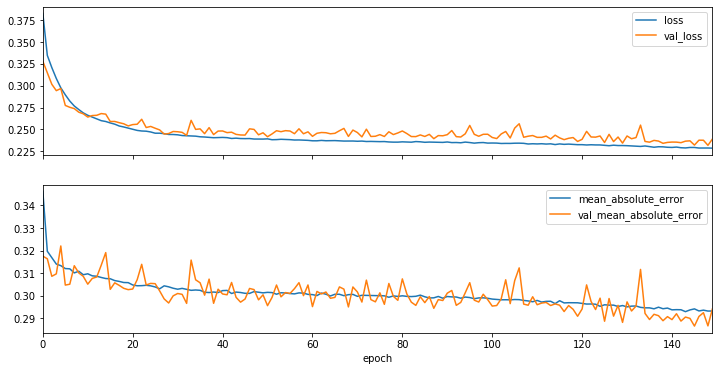

In [460]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df2.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df2.plot(x="epoch", y=["mean_absolute_error", "val_mean_absolute_error"], ax=ax1);

In [461]:
predictions2 = model2.predict(X_test)

test_df2 = pd.DataFrame(y_test).rename(columns={0:"y_test"})
test_df2["predicted"] = model2.predict(X_test)
test_df2

,y_test,predicted
0,0.054970,0.003960
1,0.155692,0.244397
2,0.108148,-0.042035
3,0.086505,0.049446
4,0.046085,-0.054690
...,...,...
22549,0.000000,0.287685
22550,4.369063,3.599681
22551,0.101855,-0.418110
22552,-1.872692,0.048451


In [464]:
print(' mean_absolute_error: ', mean_absolute_error(y_test, predictions2), '\n', 'mean_squared_error', mean_squared_error(y_test, predictions2), '\n', "explained_variance_score", explained_variance_score(y_test, predictions2))

 mean_absolute_error:  0.2978052 
 mean_squared_error 0.23369455 
 explained_variance_score 0.3570138216018677


# Add complexity to model2: model3
more node per layer (80 instead of 20)

In [470]:
input_dim = X_train.shape[1]
hidden_dim = 80
output_dim = 1

model3 = Sequential()
model3.add(Dense(hidden_dim, input_dim=input_dim, activation="sigmoid"))
model3.add(Dense(hidden_dim, input_dim=input_dim, activation="sigmoid"))
model3.add(Dense(hidden_dim, input_dim=input_dim, activation="sigmoid"))
model3.add(Dense(output_dim, activation="linear"))

model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 80)                2720      
_________________________________________________________________
dense_13 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_14 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 81        
Total params: 15,761
Trainable params: 15,761
Non-trainable params: 0
_________________________________________________________________


In [471]:
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history3 = model3.fit(X_train, y_train, validation_split=0.1, epochs=150, batch_size=32)

Train on 81194 samples, validate on 9022 samples
Epoch 1/150
81194/81194 [==============================] - 5s 57us/sample - loss: 0.3579 - mean_absolute_error: 0.3291 - val_loss: 0.3167 - val_mean_absolute_error: 0.3104
Epoch 2/150
81194/81194 [==============================] - 4s 53us/sample - loss: 0.3067 - mean_absolute_error: 0.3168 - val_loss: 0.2757 - val_mean_absolute_error: 0.3037
Epoch 3/150
81194/81194 [==============================] - 4s 51us/sample - loss: 0.2663 - mean_absolute_error: 0.3034 - val_loss: 0.2548 - val_mean_absolute_error: 0.2905
Epoch 4/150
81194/81194 [==============================] - 5s 60us/sample - loss: 0.2460 - mean_absolute_error: 0.2936 - val_loss: 0.2404 - val_mean_absolute_error: 0.2837
Epoch 5/150
81194/81194 [==============================] - 6s 76us/sample - loss: 0.2362 - mean_absolute_error: 0.2890 - val_loss: 0.2361 - val_mean_absolute_error: 0.2821
Epoch 6/150
81194/81194 [==============================] - 6s 75us/sample - loss: 0.2256 - 

81194/81194 [==============================] - 4s 50us/sample - loss: 0.1109 - mean_absolute_error: 0.2118 - val_loss: 0.1444 - val_mean_absolute_error: 0.2201- loss: 0.1092 - mean_absolute_error: 0.210 - 
Epoch 46/150
81194/81194 [==============================] - 4s 50us/sample - loss: 0.1101 - mean_absolute_error: 0.2111 - val_loss: 0.1499 - val_mean_absolute_error: 0.22821s - loss: 0.1082 - mean_
Epoch 47/150
81194/81194 [==============================] - 4s 49us/sample - loss: 0.1089 - mean_absolute_error: 0.2096 - val_loss: 0.1451 - val_mean_absolute_error: 0.2183
Epoch 48/150
81194/81194 [==============================] - 6s 74us/sample - loss: 0.1080 - mean_absolute_error: 0.2089 - val_loss: 0.1519 - val_mean_absolute_error: 0.2215
Epoch 49/150
81194/81194 [==============================] - 4s 51us/sample - loss: 0.1067 - mean_absolute_error: 0.2078 - val_loss: 0.1459 - val_mean_absolute_error: 0.2186s: 0.1061 - m
Epoch 50/150
81194/81194 [==============================] - 4s 5

Epoch 89/150
81194/81194 [==============================] - 4s 46us/sample - loss: 0.0804 - mean_absolute_error: 0.1865 - val_loss: 0.1398 - val_mean_absolute_error: 0.20810s - loss: 0.0798 - mean_absolut
Epoch 90/150
81194/81194 [==============================] - 5s 59us/sample - loss: 0.0805 - mean_absolute_error: 0.1865 - val_loss: 0.1395 - val_mean_absolute_error: 0.2080
Epoch 91/150
81194/81194 [==============================] - 5s 57us/sample - loss: 0.0804 - mean_absolute_error: 0.1863 - val_loss: 0.1379 - val_mean_absolute_error: 0.2102
Epoch 92/150
81194/81194 [==============================] - 4s 50us/sample - loss: 0.0801 - mean_absolute_error: 0.1861 - val_loss: 0.1468 - val_mean_absolute_error: 0.20992s - los - ETA: 0s - loss: 0.0802 - mean_abso
Epoch 93/150
81194/81194 [==============================] - 5s 56us/sample - loss: 0.0798 - mean_absolute_error: 0.1860 - val_loss: 0.1386 - val_mean_absolute_error: 0.2080
Epoch 94/150
81194/81194 [==============================] 

Epoch 135/150
81194/81194 [==============================] - 4s 54us/sample - loss: 0.0680 - mean_absolute_error: 0.1750 - val_loss: 0.1424 - val_mean_absolute_error: 0.2081
Epoch 136/150
81194/81194 [==============================] - 6s 75us/sample - loss: 0.0679 - mean_absolute_error: 0.1744 - val_loss: 0.1386 - val_mean_absolute_error: 0.2055
Epoch 137/150
81194/81194 [==============================] - 4s 52us/sample - loss: 0.0674 - mean_absolute_error: 0.1740 - val_loss: 0.1368 - val_mean_absolute_error: 0.2072
Epoch 138/150
81194/81194 [==============================] - 4s 46us/sample - loss: 0.0673 - mean_absolute_error: 0.1740 - val_loss: 0.1392 - val_mean_absolute_error: 0.2056
Epoch 139/150
81194/81194 [==============================] - 4s 45us/sample - loss: 0.0668 - mean_absolute_error: 0.1737 - val_loss: 0.1391 - val_mean_absolute_error: 0.2024
Epoch 140/150
81194/81194 [==============================] - 7s 81us/sample - loss: 0.0665 - mean_absolute_error: 0.1728 - val_los

In [472]:
# Get history - see convergence 
history_df3 = pd.DataFrame(history3.history)
history_df3["epoch"] = history3.epoch
history_df3.head()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error,epoch
0,0.357855,0.329139,0.316699,0.310391,0
1,0.306654,0.316839,0.275696,0.303670,1
2,0.266325,0.303384,0.254817,0.290502,2
3,0.246040,0.293637,0.240397,0.283747,3
4,0.236188,0.289017,0.236124,0.282086,4


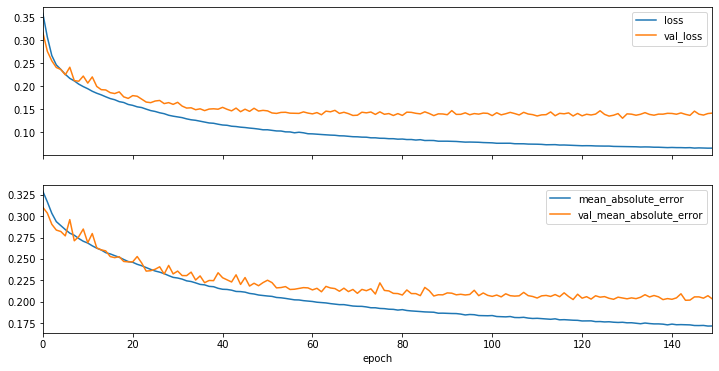

In [473]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df3.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df3.plot(x="epoch", y=["mean_absolute_error", "val_mean_absolute_error"], ax=ax1);

In [474]:
predictions3 = model3.predict(X_test)

test_df3 = pd.DataFrame(y_test).rename(columns={0:"y_test"})
test_df3["predicted"] = model3.predict(X_test)
test_df3

,y_test,predicted
0,0.054970,0.045676
1,0.155692,0.154711
2,0.108148,0.051200
3,0.086505,0.032183
4,0.046085,0.042367
...,...,...
22549,0.000000,0.062399
22550,4.369063,4.558747
22551,0.101855,0.076457
22552,-1.872692,0.094098


In [476]:
print(' mean_absolute_error: ', mean_absolute_error(y_test, predictions3), '\n',
'mean_squared_error', mean_squared_error(y_test, predictions3), '\n',
'explained_variance_score', explained_variance_score(y_test, predictions3))

 mean_absolute_error:  0.20607677 
 mean_squared_error 0.14204934 
 explained_variance_score 0.6060936450958252


In [502]:
# Gain compared to the first model: 
Gain_3_2 = 1-(0.14204934/0.23369455)
Gain_3_2

0.39215809696888526

In [504]:
# Gain compared to the first model: 
Gain_3_1 = 1-(0.14204934/0.35424855)
Gain_3_1

0.599012218963211

In [505]:
# Gain of model 2 compared to the first model: 
Gain_2_1 = 1-(0.23369455/0.35424855)
Gain_2_1

0.3403090852453736